# Music Audio Genre Classification using Deep Learning

### Team Members
**Aditya Soni  
Aritra Chowdhury  
Chandler Wann  
Rhiannon Pytlak  
Yen Wen Ting**

## Dataset

The GTZAN dataset is used and stored in a folder named Audio Files. The dataset can be downloaded [here](https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification).

## Methodology

Image Classification on generated Spectrograms and Wavelets ([Reference Link](https://www.analyticsvidhya.com/blog/2021/06/music-genres-classification-using-deep-learning-techniques/))

## Wavelet data generation..

In [1]:
def func(cls):
    img_names = os.listdir(os.path.join(os.getcwd(), 'Audio Files') + cls)
    os.makedirs(os.listdir(os.path.join(os.getcwd(), 'Audio Files', 'wavelets/train/') + cls)
    os.makedirs(os.listdir(os.path.join(os.getcwd(), 'Audio Files', 'wavelets/test/') + cls)
    train_names = img_names[:60]
    test_names = img_names[60:]
    cnt = 0
    for nm in train_names:
        cnt+=1
        x , sr = librosa.load(os.path.join(os.getcwd(), 'Audio Files')+cls+'/'+nm)
        #plt.figure(figsize=(14, 5))
        librosa.display.waveplot(x)
        plt.savefig(os.path.join(os.getcwd(), 'Audio Files', 'wavelets/train/')+cls+'/'+str(cnt)+'.png')
        plt.close()
  
    cnt = 0
    for nm in test_names:
        cnt+=1
        x , sr = librosa.load(os.path.join(os.getcwd(), 'Audio Files')+cls+'/'+nm)
        #plt.figure(figsize=(14, 5))
        librosa.display.waveplot(x)
        plt.savefig(os.path.join(os.getcwd(), 'Audio Files', 'wavelets/test/')+cls+'/'+str(cnt)+'.png')
        plt.close()

SyntaxError: invalid syntax (<ipython-input-1-039de4631549>, line 4)

In [9]:
import os
classes = [a for a in os.listdir('C:/Users/asoni/Documents/GitHub/genres') if '.' not in a]
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock', 'spectrogram', 'wavelets']


## Spectrogram generation..

In [10]:
import librosa
import matplotlib.pyplot as plt
import librosa.display


def func1(cls):
    img_names = os.listdir(os.path.join(os.getcwd(), 'Audio Files')+cls)
    os.makedirs(os.listdir(os.path.join(os.getcwd(), 'Audio Files', 'spectrogram/train/') + cls)
    os.makedirs(os.listdir(os.path.join(os.getcwd(), 'Audio Files', 'spectrogram/test/') + cls)
    print(cls)
    train_names = img_names[:60]
    test_names = img_names[60:]
    cnt = 0
    for nm in train_names:
        cnt+=1
        x , sr = librosa.load(os.path.join(os.getcwd(), 'Audio Files')+cls+'/'+nm)
        X = librosa.stft(x)
        Xdb = librosa.amplitude_to_db(abs(X))
        librosa.display.specshow(Xdb)
        plt.savefig(os.path.join(os.getcwd(), 'Audio Files', 'spectrogram/train/')+cls+'/'+str(cnt)+'.png')
        plt.close()
  
    cnt = 0
    for nm in test_names:
        cnt+=1
        x , sr = librosa.load(os.path.join(os.getcwd(), 'Audio Files')+cls+'/'+nm)
        X = librosa.stft(x)
        Xdb = librosa.amplitude_to_db(abs(X))
        librosa.display.specshow(Xdb)
        plt.savefig(os.path.join(os.getcwd(), 'Audio Files', 'spectrogram/test/')cls+'/'+str(cnt)+'.png')
        plt.close()

In [11]:
# for c in classes:
#     func(c)

In [12]:
# for c in ['reggae', 'rock']:
#     func1(c)

## Model training..

In [13]:
#!pip3 install opencv-python

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [15]:
labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
img_size = 256
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [16]:
train = get_data(os.path.join(os.getcwd(), 'Audio Files', 'spectrogram', 'train'))
val = get_data(os.path.join(os.getcwd(), 'Audio Files', 'spectrogram', 'test'))

<ipython-input-15-4b6cdbd5c0d3>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [17]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [18]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        #rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        #horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [19]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0

In [20]:
opt = Adam(lr=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

C:\Users\asoni\AppData\Roaming\Python\Python38\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [45]:
history_run = model.fit(x_train,y_train,epochs = 500, validation_data = (x_val, y_val))

Epoch 1/500
19/19 [==============================] - 14s 730ms/step - loss: 2.2672 - accuracy: 0.1700 - val_loss: 2.1901 - val_accuracy: 0.1675
Epoch 2/500
19/19 [==============================] - 19s 1s/step - loss: 2.1904 - accuracy: 0.2067 - val_loss: 2.1411 - val_accuracy: 0.2075
Epoch 3/500
19/19 [==============================] - 20s 1s/step - loss: 2.1312 - accuracy: 0.2383 - val_loss: 2.1025 - val_accuracy: 0.2425
Epoch 4/500
19/19 [==============================] - 20s 1s/step - loss: 2.0787 - accuracy: 0.2583 - val_loss: 2.0652 - val_accuracy: 0.2700
Epoch 5/500
19/19 [==============================] - 21s 1s/step - loss: 2.0299 - accuracy: 0.2750 - val_loss: 2.0335 - val_accuracy: 0.2825
Epoch 6/500
19/19 [==============================] - 25s 1s/step - loss: 1.9828 - accuracy: 0.2850 - val_loss: 2.0040 - val_accuracy: 0.3000
Epoch 7/500
19/19 [==============================] - 20s 1s/step - loss: 1.9332 - accuracy: 0.3183 - val_loss: 1.9784 - val_accuracy: 0.3025
Epoch 8/50

19/19 [==============================] - 17s 932ms/step - loss: 0.9888 - accuracy: 0.6567 - val_loss: 1.5135 - val_accuracy: 0.4150
Epoch 115/500
19/19 [==============================] - 17s 933ms/step - loss: 0.9926 - accuracy: 0.6617 - val_loss: 1.5094 - val_accuracy: 0.4275
Epoch 116/500
19/19 [==============================] - 17s 932ms/step - loss: 0.9766 - accuracy: 0.6700 - val_loss: 1.5107 - val_accuracy: 0.4200
Epoch 117/500
19/19 [==============================] - 17s 927ms/step - loss: 0.9864 - accuracy: 0.6733 - val_loss: 1.5094 - val_accuracy: 0.4225
Epoch 118/500
19/19 [==============================] - 17s 924ms/step - loss: 0.9923 - accuracy: 0.6733 - val_loss: 1.5064 - val_accuracy: 0.4200
Epoch 119/500
19/19 [==============================] - 17s 938ms/step - loss: 0.9757 - accuracy: 0.6833 - val_loss: 1.5023 - val_accuracy: 0.4175
Epoch 120/500
19/19 [==============================] - 17s 924ms/step - loss: 0.9683 - accuracy: 0.6833 - val_loss: 1.4993 - val_accuracy:

19/19 [==============================] - 16s 849ms/step - loss: 0.7440 - accuracy: 0.7733 - val_loss: 1.4013 - val_accuracy: 0.4800
Epoch 227/500
19/19 [==============================] - 16s 869ms/step - loss: 0.7436 - accuracy: 0.7933 - val_loss: 1.3977 - val_accuracy: 0.4750
Epoch 228/500
19/19 [==============================] - 16s 846ms/step - loss: 0.7388 - accuracy: 0.7750 - val_loss: 1.3960 - val_accuracy: 0.4725
Epoch 229/500
19/19 [==============================] - 16s 852ms/step - loss: 0.7503 - accuracy: 0.7867 - val_loss: 1.3950 - val_accuracy: 0.4725
Epoch 230/500
19/19 [==============================] - 16s 853ms/step - loss: 0.7310 - accuracy: 0.7750 - val_loss: 1.3951 - val_accuracy: 0.4800
Epoch 231/500
19/19 [==============================] - 16s 844ms/step - loss: 0.7494 - accuracy: 0.7733 - val_loss: 1.3976 - val_accuracy: 0.4775
Epoch 232/500
19/19 [==============================] - 16s 844ms/step - loss: 0.7244 - accuracy: 0.7967 - val_loss: 1.3924 - val_accuracy:

19/19 [==============================] - 16s 841ms/step - loss: 0.6132 - accuracy: 0.8217 - val_loss: 1.3549 - val_accuracy: 0.5050
Epoch 339/500
19/19 [==============================] - 16s 843ms/step - loss: 0.6052 - accuracy: 0.8250 - val_loss: 1.3602 - val_accuracy: 0.4975
Epoch 340/500
19/19 [==============================] - 16s 842ms/step - loss: 0.6029 - accuracy: 0.8383 - val_loss: 1.3599 - val_accuracy: 0.4950
Epoch 341/500
19/19 [==============================] - 16s 855ms/step - loss: 0.6069 - accuracy: 0.8250 - val_loss: 1.3572 - val_accuracy: 0.4975
Epoch 342/500
19/19 [==============================] - 16s 844ms/step - loss: 0.5968 - accuracy: 0.8400 - val_loss: 1.3595 - val_accuracy: 0.5000
Epoch 343/500
19/19 [==============================] - 16s 843ms/step - loss: 0.6106 - accuracy: 0.8317 - val_loss: 1.3578 - val_accuracy: 0.5050
Epoch 344/500
19/19 [==============================] - 16s 837ms/step - loss: 0.5900 - accuracy: 0.8367 - val_loss: 1.3596 - val_accuracy:

19/19 [==============================] - 16s 848ms/step - loss: 0.5172 - accuracy: 0.8633 - val_loss: 1.3510 - val_accuracy: 0.5200
Epoch 451/500
19/19 [==============================] - 16s 869ms/step - loss: 0.5337 - accuracy: 0.8333 - val_loss: 1.3481 - val_accuracy: 0.5175
Epoch 452/500
19/19 [==============================] - 16s 849ms/step - loss: 0.4941 - accuracy: 0.8650 - val_loss: 1.3490 - val_accuracy: 0.5175
Epoch 453/500
19/19 [==============================] - 16s 850ms/step - loss: 0.5136 - accuracy: 0.8550 - val_loss: 1.3488 - val_accuracy: 0.5150
Epoch 454/500
19/19 [==============================] - 16s 846ms/step - loss: 0.5165 - accuracy: 0.8617 - val_loss: 1.3523 - val_accuracy: 0.5125
Epoch 455/500
19/19 [==============================] - 16s 852ms/step - loss: 0.5298 - accuracy: 0.8517 - val_loss: 1.3538 - val_accuracy: 0.5150
Epoch 456/500
19/19 [==============================] - 16s 847ms/step - loss: 0.5227 - accuracy: 0.8633 - val_loss: 1.3513 - val_accuracy:

In [46]:
import pickle
model.save_weights('500_epoch_simple_lr.cpkt')

pickle.dump(history_run.history, open('history_500_epoch_simple.pkl','wb'))

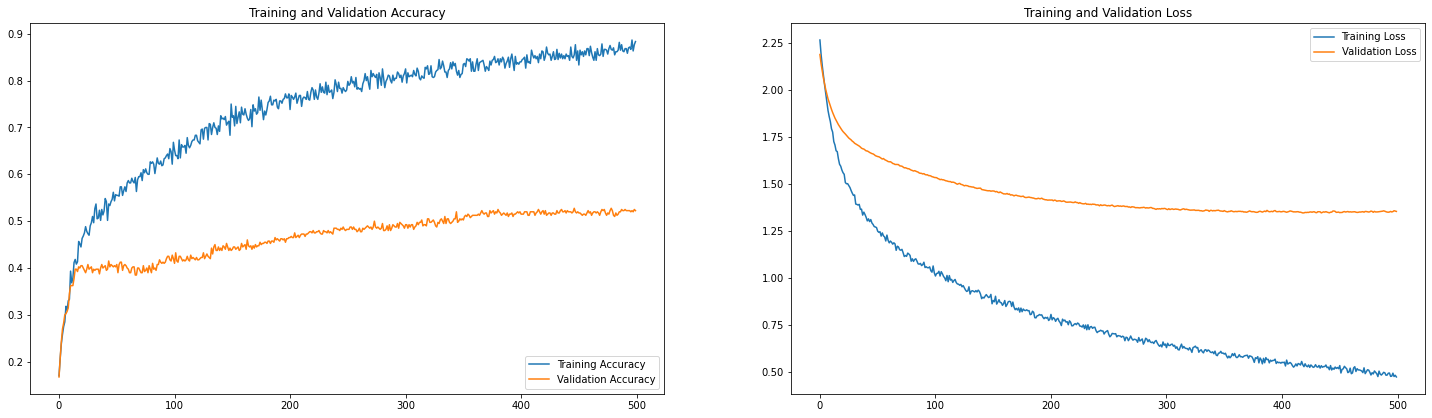

In [47]:
acc = history_run.history['accuracy']
val_acc = history_run.history['val_accuracy']
loss = history_run.history['loss']
val_loss = history_run.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [48]:
import pickle
history_run = pickle.load(open('history_500_epoch_simple.pkl','rb'))
acc = history_run['accuracy']
val_acc = history_run['val_accuracy']
loss = history_run['loss']
val_loss = history_run['val_loss']

epochs_range = range(500)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='Training Accuracy', c = '#4CAF50', linewidth=4)
ax1.plot(epochs_range, val_acc, label='Validation Accuracy', c='red', linewidth=4)
ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='Training Loss',c = '#4CAF50', linewidth=4)
ax2.plot(epochs_range, val_loss, label='Validation Loss', c='red', linewidth=4)
ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
#plt.show()
plt.savefig('sim_plot1.png',bbox_inches = 'tight')
plt.clf()

<Figure size 1080x432 with 0 Axes>

In [49]:
predict=model.predict(x_val) 
predictions=np.argmax(predict,axis=1)

In [50]:

#predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = labels))

              precision    recall  f1-score   support

       blues       0.32      0.42      0.37        40
   classical       0.92      0.82      0.87        40
     country       0.35      0.28      0.31        40
       disco       0.43      0.45      0.44        40
      hiphop       0.46      0.70      0.55        40
        jazz       0.71      0.72      0.72        40
       metal       0.67      0.60      0.63        40
         pop       0.77      0.68      0.72        40
      reggae       0.35      0.30      0.32        40
        rock       0.32      0.25      0.28        40

    accuracy                           0.52       400
   macro avg       0.53      0.52      0.52       400
weighted avg       0.53      0.52      0.52       400



In [51]:
predictions1 = np.argsort(predict,axis=1)
x=[]
for i in range(len(predictions1)):
    x.append(predictions1[i][[-1,-2]])

p=[]
for i in range(len(y_val)):
    if y_val[i] in x[i]:
        p.append(1)
    else:
        p.append(0)

In [52]:
np.mean(p)

0.7225

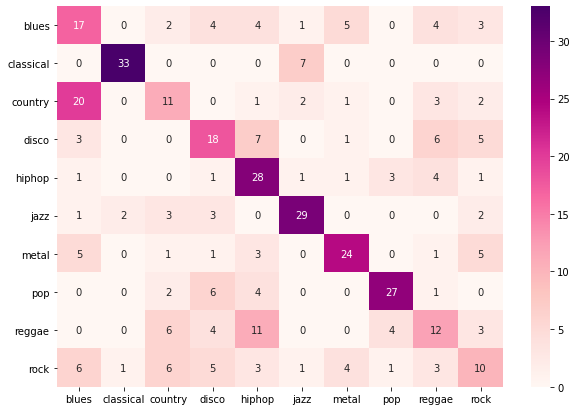

In [53]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cm1 = confusion_matrix(y_val, predictions)
df_cm = pd.DataFrame(cm1, index = [i for i in labels],
              columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="RdPu")
plt.savefig('confusion_mrtx1.png',bbox_inches = 'tight')

# Transfer Learning based modeling

In [54]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (256, 256, 3), include_top = False, weights = "imagenet")

In [55]:
base_model.trainable = False
model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(10, activation="softmax")                                     
                                ])

In [56]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history1 = model.fit(x_train,y_train,epochs = 500 , validation_data = (x_val, y_val))

C:\Users\asoni\AppData\Roaming\Python\Python38\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500


C:\Users\asoni\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


19/19 [==============================] - 17s 877ms/step - loss: 2.4999 - accuracy: 0.0900 - val_loss: 2.4528 - val_accuracy: 0.0500
Epoch 2/500
19/19 [==============================] - 16s 846ms/step - loss: 2.3438 - accuracy: 0.1083 - val_loss: 2.3415 - val_accuracy: 0.0750
Epoch 3/500
19/19 [==============================] - 16s 853ms/step - loss: 2.2744 - accuracy: 0.1650 - val_loss: 2.2721 - val_accuracy: 0.0900
Epoch 4/500
19/19 [==============================] - 16s 846ms/step - loss: 2.1958 - accuracy: 0.1917 - val_loss: 2.2192 - val_accuracy: 0.1375
Epoch 5/500
19/19 [==============================] - 16s 852ms/step - loss: 2.0990 - accuracy: 0.2567 - val_loss: 2.1740 - val_accuracy: 0.1750
Epoch 6/500
19/19 [==============================] - 16s 846ms/step - loss: 2.0377 - accuracy: 0.2717 - val_loss: 2.1349 - val_accuracy: 0.2050
Epoch 7/500
19/19 [==============================] - 16s 871ms/step - loss: 2.0099 - accuracy: 0.2917 - val_loss: 2.1005 - val_accuracy: 0.2250
Epoc

19/19 [==============================] - 16s 853ms/step - loss: 1.0080 - accuracy: 0.6683 - val_loss: 1.5243 - val_accuracy: 0.4375
Epoch 114/500
19/19 [==============================] - 16s 848ms/step - loss: 1.0030 - accuracy: 0.6533 - val_loss: 1.5221 - val_accuracy: 0.4350
Epoch 115/500
19/19 [==============================] - 16s 848ms/step - loss: 0.9970 - accuracy: 0.6683 - val_loss: 1.5201 - val_accuracy: 0.4250
Epoch 116/500
19/19 [==============================] - 16s 846ms/step - loss: 0.9977 - accuracy: 0.6617 - val_loss: 1.5217 - val_accuracy: 0.4325
Epoch 117/500
19/19 [==============================] - 16s 867ms/step - loss: 0.9833 - accuracy: 0.6717 - val_loss: 1.5157 - val_accuracy: 0.4350
Epoch 118/500
19/19 [==============================] - 16s 853ms/step - loss: 0.9528 - accuracy: 0.6783 - val_loss: 1.5147 - val_accuracy: 0.4325
Epoch 119/500
19/19 [==============================] - 16s 848ms/step - loss: 0.9692 - accuracy: 0.6750 - val_loss: 1.5150 - val_accuracy:

19/19 [==============================] - 16s 849ms/step - loss: 0.7510 - accuracy: 0.7800 - val_loss: 1.4038 - val_accuracy: 0.4800
Epoch 226/500
19/19 [==============================] - 16s 855ms/step - loss: 0.7507 - accuracy: 0.7733 - val_loss: 1.4055 - val_accuracy: 0.4775
Epoch 227/500
19/19 [==============================] - 16s 858ms/step - loss: 0.7594 - accuracy: 0.7650 - val_loss: 1.4087 - val_accuracy: 0.4775
Epoch 228/500
19/19 [==============================] - 16s 848ms/step - loss: 0.7334 - accuracy: 0.7800 - val_loss: 1.4063 - val_accuracy: 0.4750
Epoch 229/500
19/19 [==============================] - 16s 849ms/step - loss: 0.7417 - accuracy: 0.7700 - val_loss: 1.4052 - val_accuracy: 0.4700
Epoch 230/500
19/19 [==============================] - 16s 848ms/step - loss: 0.7519 - accuracy: 0.7867 - val_loss: 1.4058 - val_accuracy: 0.4775
Epoch 231/500
19/19 [==============================] - 16s 871ms/step - loss: 0.7508 - accuracy: 0.7917 - val_loss: 1.4021 - val_accuracy:

19/19 [==============================] - 16s 853ms/step - loss: 0.6042 - accuracy: 0.8200 - val_loss: 1.3641 - val_accuracy: 0.5125
Epoch 338/500
19/19 [==============================] - 16s 845ms/step - loss: 0.6078 - accuracy: 0.8400 - val_loss: 1.3660 - val_accuracy: 0.5175
Epoch 339/500
19/19 [==============================] - 16s 848ms/step - loss: 0.6084 - accuracy: 0.8200 - val_loss: 1.3584 - val_accuracy: 0.5250
Epoch 340/500
19/19 [==============================] - 16s 856ms/step - loss: 0.6101 - accuracy: 0.8283 - val_loss: 1.3592 - val_accuracy: 0.5200
Epoch 341/500
19/19 [==============================] - 16s 852ms/step - loss: 0.5829 - accuracy: 0.8433 - val_loss: 1.3607 - val_accuracy: 0.5150
Epoch 342/500
19/19 [==============================] - 16s 864ms/step - loss: 0.6121 - accuracy: 0.8283 - val_loss: 1.3616 - val_accuracy: 0.5250
Epoch 343/500
19/19 [==============================] - 16s 851ms/step - loss: 0.6281 - accuracy: 0.8117 - val_loss: 1.3636 - val_accuracy:

19/19 [==============================] - 16s 865ms/step - loss: 0.5231 - accuracy: 0.8533 - val_loss: 1.3534 - val_accuracy: 0.5325
Epoch 450/500
19/19 [==============================] - 16s 846ms/step - loss: 0.5134 - accuracy: 0.8617 - val_loss: 1.3521 - val_accuracy: 0.5350
Epoch 451/500
19/19 [==============================] - 16s 850ms/step - loss: 0.5204 - accuracy: 0.8517 - val_loss: 1.3557 - val_accuracy: 0.5325
Epoch 452/500
19/19 [==============================] - 16s 846ms/step - loss: 0.5378 - accuracy: 0.8450 - val_loss: 1.3526 - val_accuracy: 0.5300
Epoch 453/500
19/19 [==============================] - 16s 845ms/step - loss: 0.5080 - accuracy: 0.8767 - val_loss: 1.3514 - val_accuracy: 0.5350
Epoch 454/500
19/19 [==============================] - 16s 859ms/step - loss: 0.5153 - accuracy: 0.8650 - val_loss: 1.3506 - val_accuracy: 0.5275
Epoch 455/500
19/19 [==============================] - 16s 853ms/step - loss: 0.5194 - accuracy: 0.8583 - val_loss: 1.3499 - val_accuracy:

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 1280)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


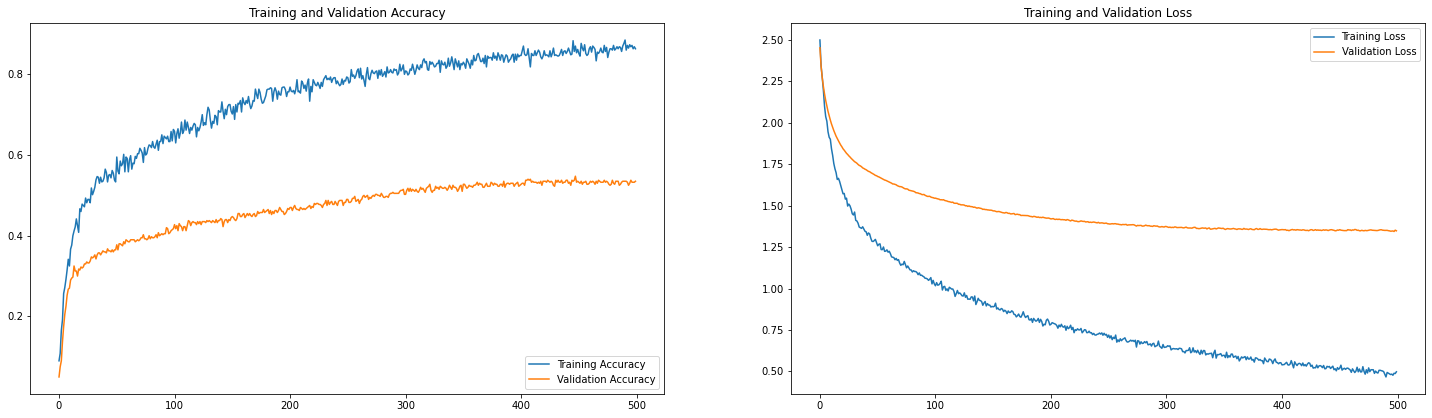

In [58]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [59]:
# pickle.dump(history.history, open('history_500_epoch_tr.pkl','wb'))

In [60]:
import pickle
history = pickle.load(open('history_500_epoch_tr.pkl','rb'))
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs_range = range(500)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='Training Accuracy', c = '#4CAF50', linewidth=4)
ax1.plot(epochs_range, val_acc, label='Validation Accuracy', c='red', linewidth=4)
ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='Training Loss',c = '#4CAF50', linewidth=4)
ax2.plot(epochs_range, val_loss, label='Validation Loss', c='red', linewidth=4)
ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
#plt.show()
plt.savefig('tfr_plot1.png',bbox_inches = 'tight')
plt.clf()

<Figure size 1080x432 with 0 Axes>

In [61]:
predict=model.predict(x_val) 
predictions=np.argmax(predict,axis=1)

In [62]:
# predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = labels))

              precision    recall  f1-score   support

       blues       0.35      0.45      0.40        40
   classical       0.92      0.85      0.88        40
     country       0.37      0.33      0.35        40
       disco       0.44      0.45      0.44        40
      hiphop       0.48      0.72      0.57        40
        jazz       0.70      0.65      0.68        40
       metal       0.68      0.62      0.65        40
         pop       0.82      0.68      0.74        40
      reggae       0.38      0.38      0.38        40
        rock       0.32      0.23      0.26        40

    accuracy                           0.54       400
   macro avg       0.55      0.53      0.53       400
weighted avg       0.55      0.54      0.53       400



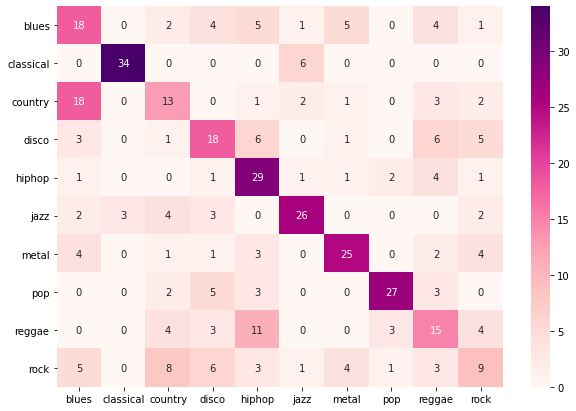

In [63]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cm1 = confusion_matrix(y_val, predictions)
df_cm = pd.DataFrame(cm1, index = [i for i in labels],
              columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="RdPu")
plt.savefig('confusion_mrtx2.png',bbox_inches = 'tight')

In [64]:
model.save_weights('500_epoch_transfer_lr.cpkt')
pickle.dump(history1.history, open('history_500_epoch_tr.pkl','wb'))


## Multi-Model Training

In [65]:
sp_train = get_data(os.path.join(os.getcwd(), 'Audio Files', 'spectrogram/train/'))
sp_val = get_data(os.path.join(os.getcwd(), 'Audio Files', 'spectrogram/test/'))

wv_train = get_data(os.path.join(os.getcwd(), 'Audio Files', 'wavelets/train/'))
wv_val = get_data(os.path.join(os.getcwd(), 'Audio Files', 'wavelets/test/'))

<ipython-input-15-4b6cdbd5c0d3>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [66]:
x_sp_train = []
y_sp_train = []
x_sp_val = []
y_sp_val = []

for feature, label in sp_train:
  x_sp_train.append(feature)
  y_sp_train.append(label)

for feature, label in sp_val:
  x_sp_val.append(feature)
  y_sp_val.append(label)

# Normalize the data
x_sp_train = np.array(x_sp_train) / 255
x_sp_val = np.array(x_sp_val) / 255

x_sp_train.reshape(-1, img_size, img_size, 1)
y_sp_train = np.array(y_sp_train)

x_sp_val.reshape(-1, img_size, img_size, 1)
y_sp_val = np.array(y_sp_val)

In [67]:
x_wv_train = []
y_wv_train = []
x_wv_val = []
y_wv_val = []

for feature, label in wv_train:
    x_wv_train.append(feature)
    y_wv_train.append(label)

for feature, label in wv_val:
    x_wv_val.append(feature)
    y_wv_val.append(label)

# Normalize the data
x_wv_train = np.array(x_wv_train) / 255
x_wv_val = np.array(x_wv_val) / 255

x_wv_train.reshape(-1, img_size, img_size, 1)
y_wv_train = np.array(y_wv_train)

x_wv_val.reshape(-1, img_size, img_size, 1)
y_wv_val = np.array(y_wv_val)

In [68]:
datagen_sp = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        #rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        #horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen_sp.fit(x_sp_train)

datagen_wv = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        #rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        #horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen_wv.fit(x_wv_train)

In [69]:
input_sp = keras.Input(shape=(256,256,3))
input_wv = keras.Input(shape=(256,256,3))

x = Conv2D(32,3,padding="same", activation="relu")(input_sp)
x = MaxPool2D()(x)
x = Conv2D(64, 3, padding="same", activation="relu")(x)
x = MaxPool2D()(x)
x = Dropout(0.4)(x)
x = Flatten()(x)
x = Dense(128,activation="relu")(x)
x = keras.Model(inputs=input_sp, outputs=x)

y = Conv2D(32,3,padding="same", activation="relu")(input_wv)
y = MaxPool2D()(y)
y = Conv2D(64, 3, padding="same", activation="relu")(y)
y = MaxPool2D()(y)
y = Dropout(0.4)(y)
y = Flatten()(y)
y = Dense(128,activation="relu")(y)
y = keras.Model(inputs=input_wv, outputs=y)

from tensorflow.keras.layers import concatenate
combined = concatenate([x.output, y.output])

z = Dense(32, activation="relu")(combined)
z = Dense(10, activation="softmax")(z)

model = keras.Model(inputs=[x.input, y.input], outputs=z)

In [70]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 256, 256, 32  896         ['input_3[0][0]']                
                                )                                                           

In [71]:
opt = Adam(lr=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

C:\Users\asoni\AppData\Roaming\Python\Python38\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [72]:
history2 = model.fit([x_sp_train,x_wv_train],y_sp_train,epochs = 500, validation_data = ([x_sp_val,x_wv_val], y_sp_val))
import pickle
model.save_weights('500_epoch_multi_lr.cpkt')
pickle.dump(history2.history, open('history_500_epoch_multi.pkl','wb'))

Epoch 1/500


C:\Users\asoni\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


19/19 [==============================] - 41s 2s/step - loss: 2.3553 - accuracy: 0.1067 - val_loss: 2.2912 - val_accuracy: 0.1200
Epoch 2/500
19/19 [==============================] - 39s 2s/step - loss: 2.2407 - accuracy: 0.1233 - val_loss: 2.2870 - val_accuracy: 0.1150
Epoch 3/500
19/19 [==============================] - 37s 2s/step - loss: 2.1535 - accuracy: 0.1550 - val_loss: 2.2147 - val_accuracy: 0.1450
Epoch 4/500
19/19 [==============================] - 37s 2s/step - loss: 2.0671 - accuracy: 0.1900 - val_loss: 2.2538 - val_accuracy: 0.0725
Epoch 5/500
19/19 [==============================] - 37s 2s/step - loss: 1.9856 - accuracy: 0.2167 - val_loss: 2.2308 - val_accuracy: 0.1250
Epoch 6/500
19/19 [==============================] - 39s 2s/step - loss: 1.8886 - accuracy: 0.2467 - val_loss: 2.2679 - val_accuracy: 0.1275
Epoch 7/500
19/19 [==============================] - 37s 2s/step - loss: 1.8091 - accuracy: 0.2817 - val_loss: 2.1897 - val_accuracy: 0.2100
Epoch 8/500
19/19 [======

Epoch 59/500
19/19 [==============================] - 36s 2s/step - loss: 0.0146 - accuracy: 0.9983 - val_loss: 3.8471 - val_accuracy: 0.3575
Epoch 60/500
19/19 [==============================] - 36s 2s/step - loss: 0.0248 - accuracy: 0.9967 - val_loss: 3.9398 - val_accuracy: 0.3525
Epoch 61/500
19/19 [==============================] - 36s 2s/step - loss: 0.0148 - accuracy: 0.9983 - val_loss: 4.0138 - val_accuracy: 0.3525
Epoch 62/500
19/19 [==============================] - 37s 2s/step - loss: 0.0178 - accuracy: 0.9983 - val_loss: 3.9986 - val_accuracy: 0.3625
Epoch 63/500
19/19 [==============================] - 36s 2s/step - loss: 0.0254 - accuracy: 0.9967 - val_loss: 4.1328 - val_accuracy: 0.3450
Epoch 64/500
19/19 [==============================] - 36s 2s/step - loss: 0.0167 - accuracy: 0.9983 - val_loss: 3.9435 - val_accuracy: 0.3475
Epoch 65/500
19/19 [==============================] - 36s 2s/step - loss: 0.0157 - accuracy: 0.9983 - val_loss: 4.0051 - val_accuracy: 0.3575
Epoch 

19/19 [==============================] - 36s 2s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 4.4381 - val_accuracy: 0.3725
Epoch 174/500
19/19 [==============================] - 37s 2s/step - loss: 0.0207 - accuracy: 0.9967 - val_loss: 4.4737 - val_accuracy: 0.3650
Epoch 175/500
19/19 [==============================] - 36s 2s/step - loss: 0.0101 - accuracy: 0.9983 - val_loss: 4.3324 - val_accuracy: 0.3575
Epoch 176/500
19/19 [==============================] - 36s 2s/step - loss: 0.0192 - accuracy: 0.9967 - val_loss: 4.2010 - val_accuracy: 0.3575
Epoch 177/500
19/19 [==============================] - 36s 2s/step - loss: 0.0070 - accuracy: 0.9983 - val_loss: 4.2179 - val_accuracy: 0.3700
Epoch 178/500
19/19 [==============================] - 36s 2s/step - loss: 0.0048 - accuracy: 0.9983 - val_loss: 4.3305 - val_accuracy: 0.3700
Epoch 179/500
19/19 [==============================] - 37s 2s/step - loss: 0.0070 - accuracy: 0.9983 - val_loss: 4.5542 - val_accuracy: 0.3600
Epoch 180/500

19/19 [==============================] - 36s 2s/step - loss: 0.0133 - accuracy: 0.9983 - val_loss: 4.0446 - val_accuracy: 0.3400
Epoch 288/500
19/19 [==============================] - 36s 2s/step - loss: 0.0058 - accuracy: 0.9983 - val_loss: 4.2322 - val_accuracy: 0.3425
Epoch 289/500
19/19 [==============================] - 36s 2s/step - loss: 0.0083 - accuracy: 0.9983 - val_loss: 4.1635 - val_accuracy: 0.3475
Epoch 290/500
19/19 [==============================] - 36s 2s/step - loss: 0.0090 - accuracy: 0.9983 - val_loss: 4.4467 - val_accuracy: 0.3525
Epoch 291/500
19/19 [==============================] - 36s 2s/step - loss: 0.0043 - accuracy: 0.9967 - val_loss: 4.3962 - val_accuracy: 0.3525
Epoch 292/500
19/19 [==============================] - 36s 2s/step - loss: 0.0062 - accuracy: 0.9983 - val_loss: 4.2387 - val_accuracy: 0.3650
Epoch 293/500
19/19 [==============================] - 36s 2s/step - loss: 0.0070 - accuracy: 0.9967 - val_loss: 4.2199 - val_accuracy: 0.3550
Epoch 294/500

19/19 [==============================] - 41s 2s/step - loss: 0.0049 - accuracy: 0.9983 - val_loss: 4.2376 - val_accuracy: 0.3625
Epoch 402/500
19/19 [==============================] - 41s 2s/step - loss: 0.0035 - accuracy: 0.9967 - val_loss: 4.2825 - val_accuracy: 0.3600
Epoch 403/500
19/19 [==============================] - 42s 2s/step - loss: 0.0049 - accuracy: 0.9967 - val_loss: 4.1573 - val_accuracy: 0.3550
Epoch 404/500
19/19 [==============================] - 42s 2s/step - loss: 0.0047 - accuracy: 0.9967 - val_loss: 4.1978 - val_accuracy: 0.3675
Epoch 405/500
19/19 [==============================] - 41s 2s/step - loss: 0.0038 - accuracy: 0.9967 - val_loss: 4.2075 - val_accuracy: 0.3600
Epoch 406/500
19/19 [==============================] - 41s 2s/step - loss: 0.0046 - accuracy: 0.9983 - val_loss: 4.1685 - val_accuracy: 0.3400
Epoch 407/500
19/19 [==============================] - 41s 2s/step - loss: 0.0052 - accuracy: 0.9983 - val_loss: 4.2238 - val_accuracy: 0.3600
Epoch 408/500

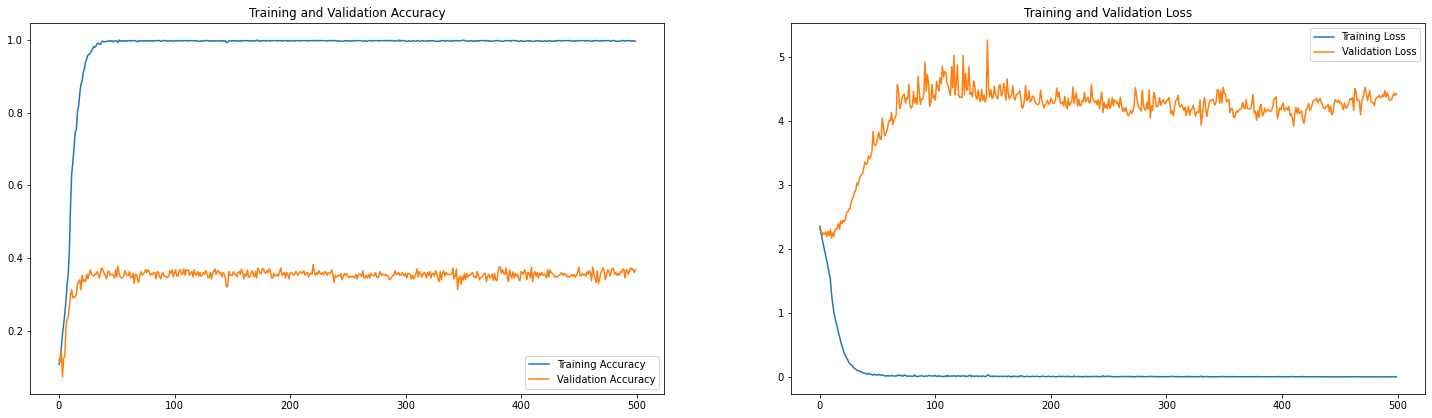

In [73]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [74]:
import pickle
history = pickle.load(open('history_500_epoch_multi.pkl','rb'))
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs_range = range(500)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='Training Accuracy', c = '#4CAF50', linewidth=4)
ax1.plot(epochs_range, val_acc, label='Validation Accuracy', c='red', linewidth=4)
ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='Training Loss',c = '#4CAF50', linewidth=4)
ax2.plot(epochs_range, val_loss, label='Validation Loss', c='red', linewidth=4)
ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
#plt.show()
plt.savefig('multi_plot1.png',bbox_inches = 'tight')
plt.clf()

<Figure size 1080x432 with 0 Axes>

In [75]:
predictions = model.predict([x_sp_val,x_wv_val])
print(classification_report(y_wv_val, np.argmax(predictions, axis=1), target_names = labels))

              precision    recall  f1-score   support

       blues       0.32      0.30      0.31        40
   classical       0.69      0.62      0.66        40
     country       0.12      0.12      0.12        40
       disco       0.42      0.35      0.38        40
      hiphop       0.28      0.33      0.30        40
        jazz       0.44      0.35      0.39        40
       metal       0.41      0.62      0.50        40
         pop       0.67      0.60      0.63        40
      reggae       0.22      0.28      0.25        40
        rock       0.16      0.10      0.12        40

    accuracy                           0.37       400
   macro avg       0.37      0.37      0.37       400
weighted avg       0.37      0.37      0.37       400



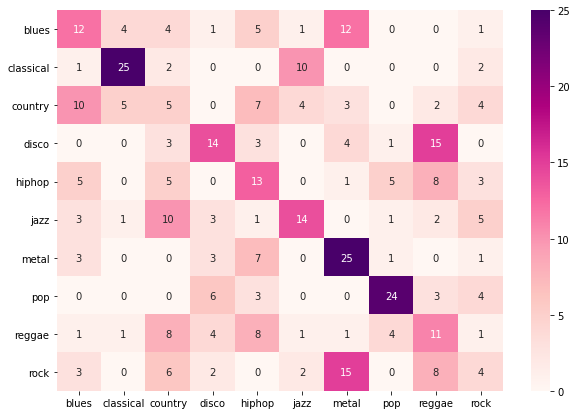

In [76]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
predictions = np.argmax(predictions, axis=1)
cm1 = confusion_matrix(y_val, predictions)
df_cm = pd.DataFrame(cm1, index = [i for i in labels],
              columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="RdPu")
plt.savefig('confusion_mrtx3.png',bbox_inches = 'tight')

In [77]:
epochs_range = range(500)
import matplotlib.pyplot as plt
import pickle 
history = pickle.load(open('history_500_epoch_simple.pkl','rb'))
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

history = pickle.load(open('history_500_epoch_tr.pkl','rb'))
acc1 = history['accuracy']
val_acc1 = history['val_accuracy']
loss1 = history['loss']
val_loss1 = history['val_loss']

history = pickle.load(open('history_500_epoch_multi.pkl','rb'))
acc2 = history['accuracy']
val_acc2 = history['val_accuracy']
loss2 = history['loss']
val_loss2 = history['val_loss']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='CNN Training Accuracy', c = '#4CAF50', linewidth=4)
ax1.plot(epochs_range, val_acc, label='CNN Validation Accuracy', c='red', linewidth=4)
ax1.plot(epochs_range, acc1, label='Transfer learning Training Accuracy', c = '#e72866', linewidth=4)
ax1.plot(epochs_range, val_acc1, label='Transfer learning Validation Accuracy', c='#282ec7', linewidth=4)
ax1.plot(epochs_range, acc2, label='Multi modal Training Accuracy', c = '#171c1c', linewidth=4)
ax1.plot(epochs_range, val_acc2, label='Multi modal Validation Accuracy', c='#62176e', linewidth=4)

ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='CNN Training Loss',c = '#4CAF50', linewidth=4)
ax2.plot(epochs_range, val_loss, label='CNN Validation Loss', c='red', linewidth=4)
ax2.plot(epochs_range, loss1, label='Transfer learning Training Loss',c = '#c72866', linewidth=4)
ax2.plot(epochs_range, val_loss1, label='Transfer learning Validation Loss', c='#282ec7', linewidth=4)
ax2.plot(epochs_range, loss2, label='Multi modal Training Loss',c = '#171c1c', linewidth=4)
ax2.plot(epochs_range, val_loss2, label='Multi modal learning Validation Loss', c='#62176e', linewidth=4)

ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
#plt.show()
plt.savefig('all_1.png',bbox_inches = 'tight')
plt.clf()

<Figure size 1080x432 with 0 Axes>

In [85]:
predict = model.predict([x_sp_val,x_wv_val])
predictions=np.argmax(predict,axis=1)
#predictions = model.predict_classes(x_val)
# predictions = predictions.reshape(1,-1)[0]
# print(classification_report(y_val, predictions, target_names = labels))

predictions1 = np.argsort(predict,axis=1)
x=[]
for i in range(len(predictions1)):
    x.append(predictions1[i][[-1,-2]])

p=[]
for i in range(len(y_val)):
    if y_val[i] in x[i]:
        p.append(1)
    else:
        p.append(0)
        
np.mean(p)

0.525